# Classification of breast cancer 

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest,chi2,RFECV
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
df = pd.read_csv('./data/wdbc.data.csv')

## Data preprocessing and analysis

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Data shape

In [4]:
df.shape

(569, 32)

### Dataset information

The dataset is consisted of 32 attributes. Attribute 1 and 2 represent the id of the specific case data and the diagnosis which can be malignant or benign (marked as B or M) respectively. Attributes 3-32 are various measurments of the cells which represent the possible cancerous growth. They are split into 3 groups (3-12, 13-22, 23-32) where each group containts the same 10 attributes but with different measuring used. Group 1 uses mean, group 2 standard error or SE and group 3 worst. The attributes represented with these 3 groups are radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension of the cells.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Checking for missing values 

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Looking for duplicates

In [8]:
dups = df.duplicated()
df[dups]

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]

In [9]:
df = df.drop(columns=['id'])
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Median values

In [10]:
df.median(numeric_only=True)

radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_worst            0.211900
concavity_wo

Mean values

In [11]:
df.mean(numeric_only=True)

radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
concavity_wo

In [12]:
df.mode()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          B        12.34         14.93           82.61      512.2   
1        NaN          NaN         15.70           87.76        NaN   
2        NaN          NaN         16.84          134.70        NaN   
3        NaN          NaN         16.85             NaN        NaN   
4        NaN          NaN         17.46             NaN        NaN   
5        NaN          NaN         18.22             NaN        NaN   
6        NaN          NaN         18.90             NaN        NaN   
7        NaN          NaN         19.83             NaN        NaN   
8        NaN          NaN         20.52             NaN        NaN   
9        NaN          NaN           NaN             NaN        NaN   
10       NaN          NaN           NaN             NaN        NaN   
11       NaN          NaN           NaN             NaN        NaN   
12       NaN          NaN           NaN             NaN        NaN   
13       NaN          NaN           NaN             NaN        NaN   
14       NaN          NaN           NaN             NaN        NaN   
15       NaN          NaN           NaN             NaN        NaN   
16       NaN          NaN           NaN             NaN        NaN   
17       NaN          NaN           NaN             NaN        NaN   
18       NaN          NaN           NaN             NaN        NaN   
19       NaN          NaN           NaN             NaN        NaN   
20       NaN          NaN           NaN             NaN        NaN   
21       NaN          NaN           NaN             NaN        NaN   
22       NaN          NaN           NaN             NaN        NaN   
23       NaN          NaN           NaN             NaN        NaN   
24       NaN          NaN           NaN             NaN        NaN   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.1007            0.1147             0.0                  0.0   
1               NaN            0.1206             NaN                  NaN   
2               NaN               NaN             NaN                  NaN   
3               NaN               NaN             NaN                  NaN   
4               NaN               NaN             NaN                  NaN   
5               NaN               NaN             NaN                  NaN   
6               NaN               NaN             NaN                  NaN   
7               NaN               NaN             NaN                  NaN   
8               NaN               NaN             NaN                  NaN   
9               NaN               NaN             NaN                  NaN   
10              NaN               NaN             NaN                  NaN   
11              NaN               NaN             NaN                  NaN   
12              NaN               NaN             NaN                  NaN   
13              NaN               NaN             NaN                  NaN   
14              NaN               NaN             NaN                  NaN   
15              NaN               NaN             NaN                  NaN   
16              NaN               NaN             NaN                  NaN   
17              NaN               NaN             NaN                  NaN   
18              NaN               NaN             NaN                  NaN   
19              NaN               NaN             NaN                  NaN   
20              NaN               NaN             NaN                  NaN   
21              NaN               NaN             NaN                  NaN   
22              NaN               NaN             NaN                  NaN   
23              NaN               NaN             NaN                  NaN   
24              NaN               NaN             NaN                  NaN   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0          0.1601  ...         12.36          17.70            101.7   
1        

In [13]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

### Data Visualizations

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

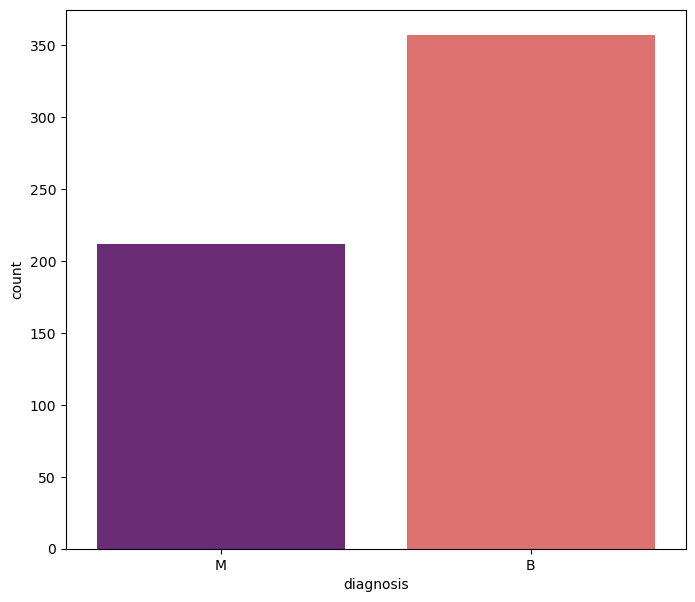

In [14]:
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

<AxesSubplot: >

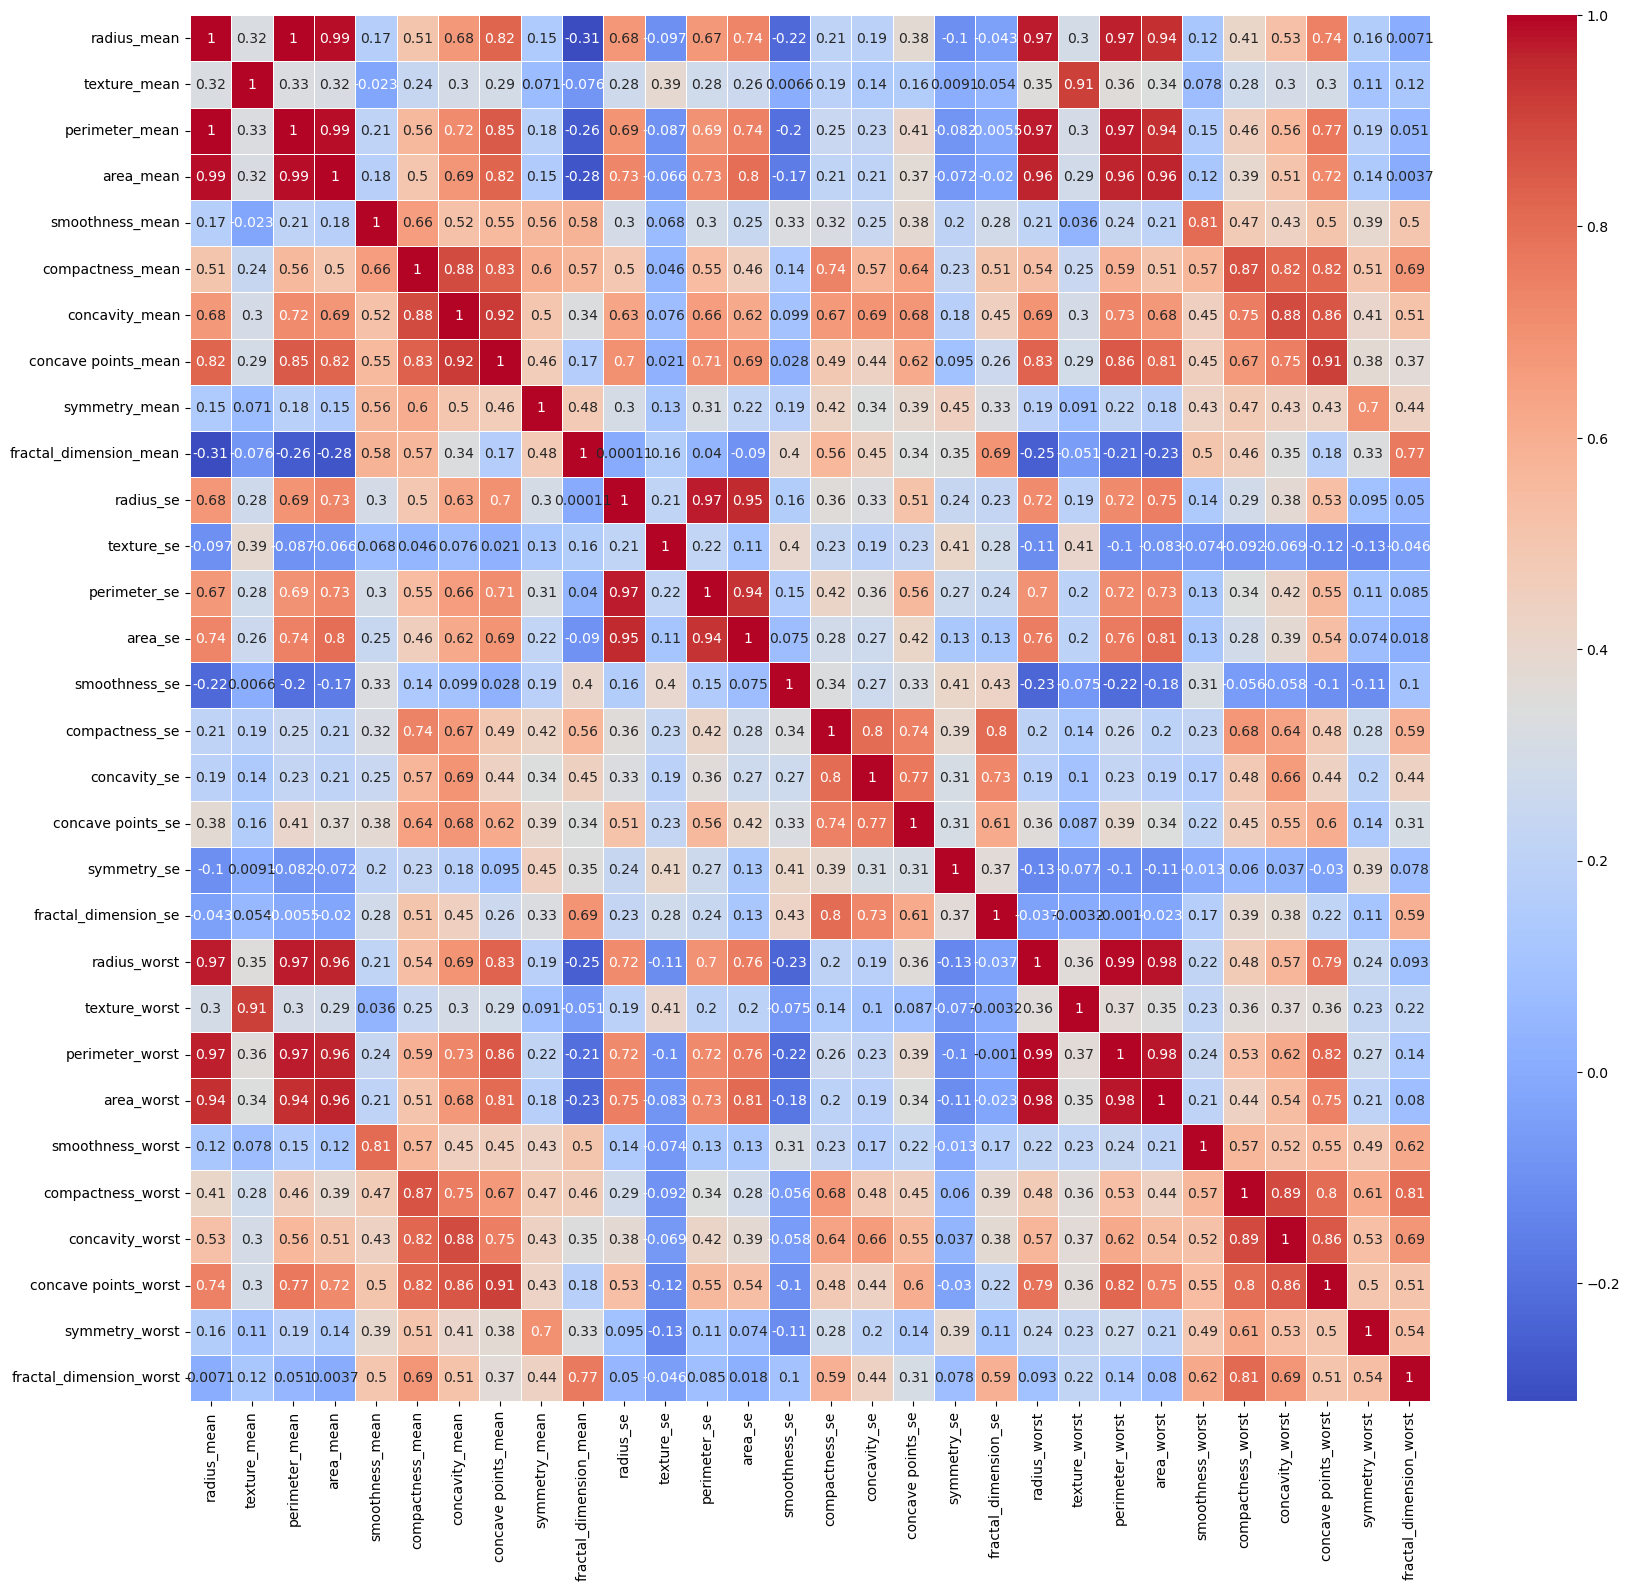

In [15]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="coolwarm")

In [16]:
col_mean = list(df.columns[1:11])
col_se = list(df.columns[11:21])
col_worst = list(df.columns[21:31])

col_mean_d = ['diagnosis',*col_mean]
col_se_d = ['diagnosis',*col_se]
col_worst_d = ['diagnosis',*col_worst]


In [17]:
def graph_scores(score_list , labels , title):
    data = {"Results":score_list,"Models":labels}
    
    train_score = pd.DataFrame(data, columns=['Results', 'Models'])
    plt.figure(figsize=(5, 5))
    plots = sns.barplot(x="Models", y="Results", data=train_score)
    
    for bar in plots.patches:

        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 5),
                       textcoords='offset points')
    plt.title(title)
    


#### Mean Values

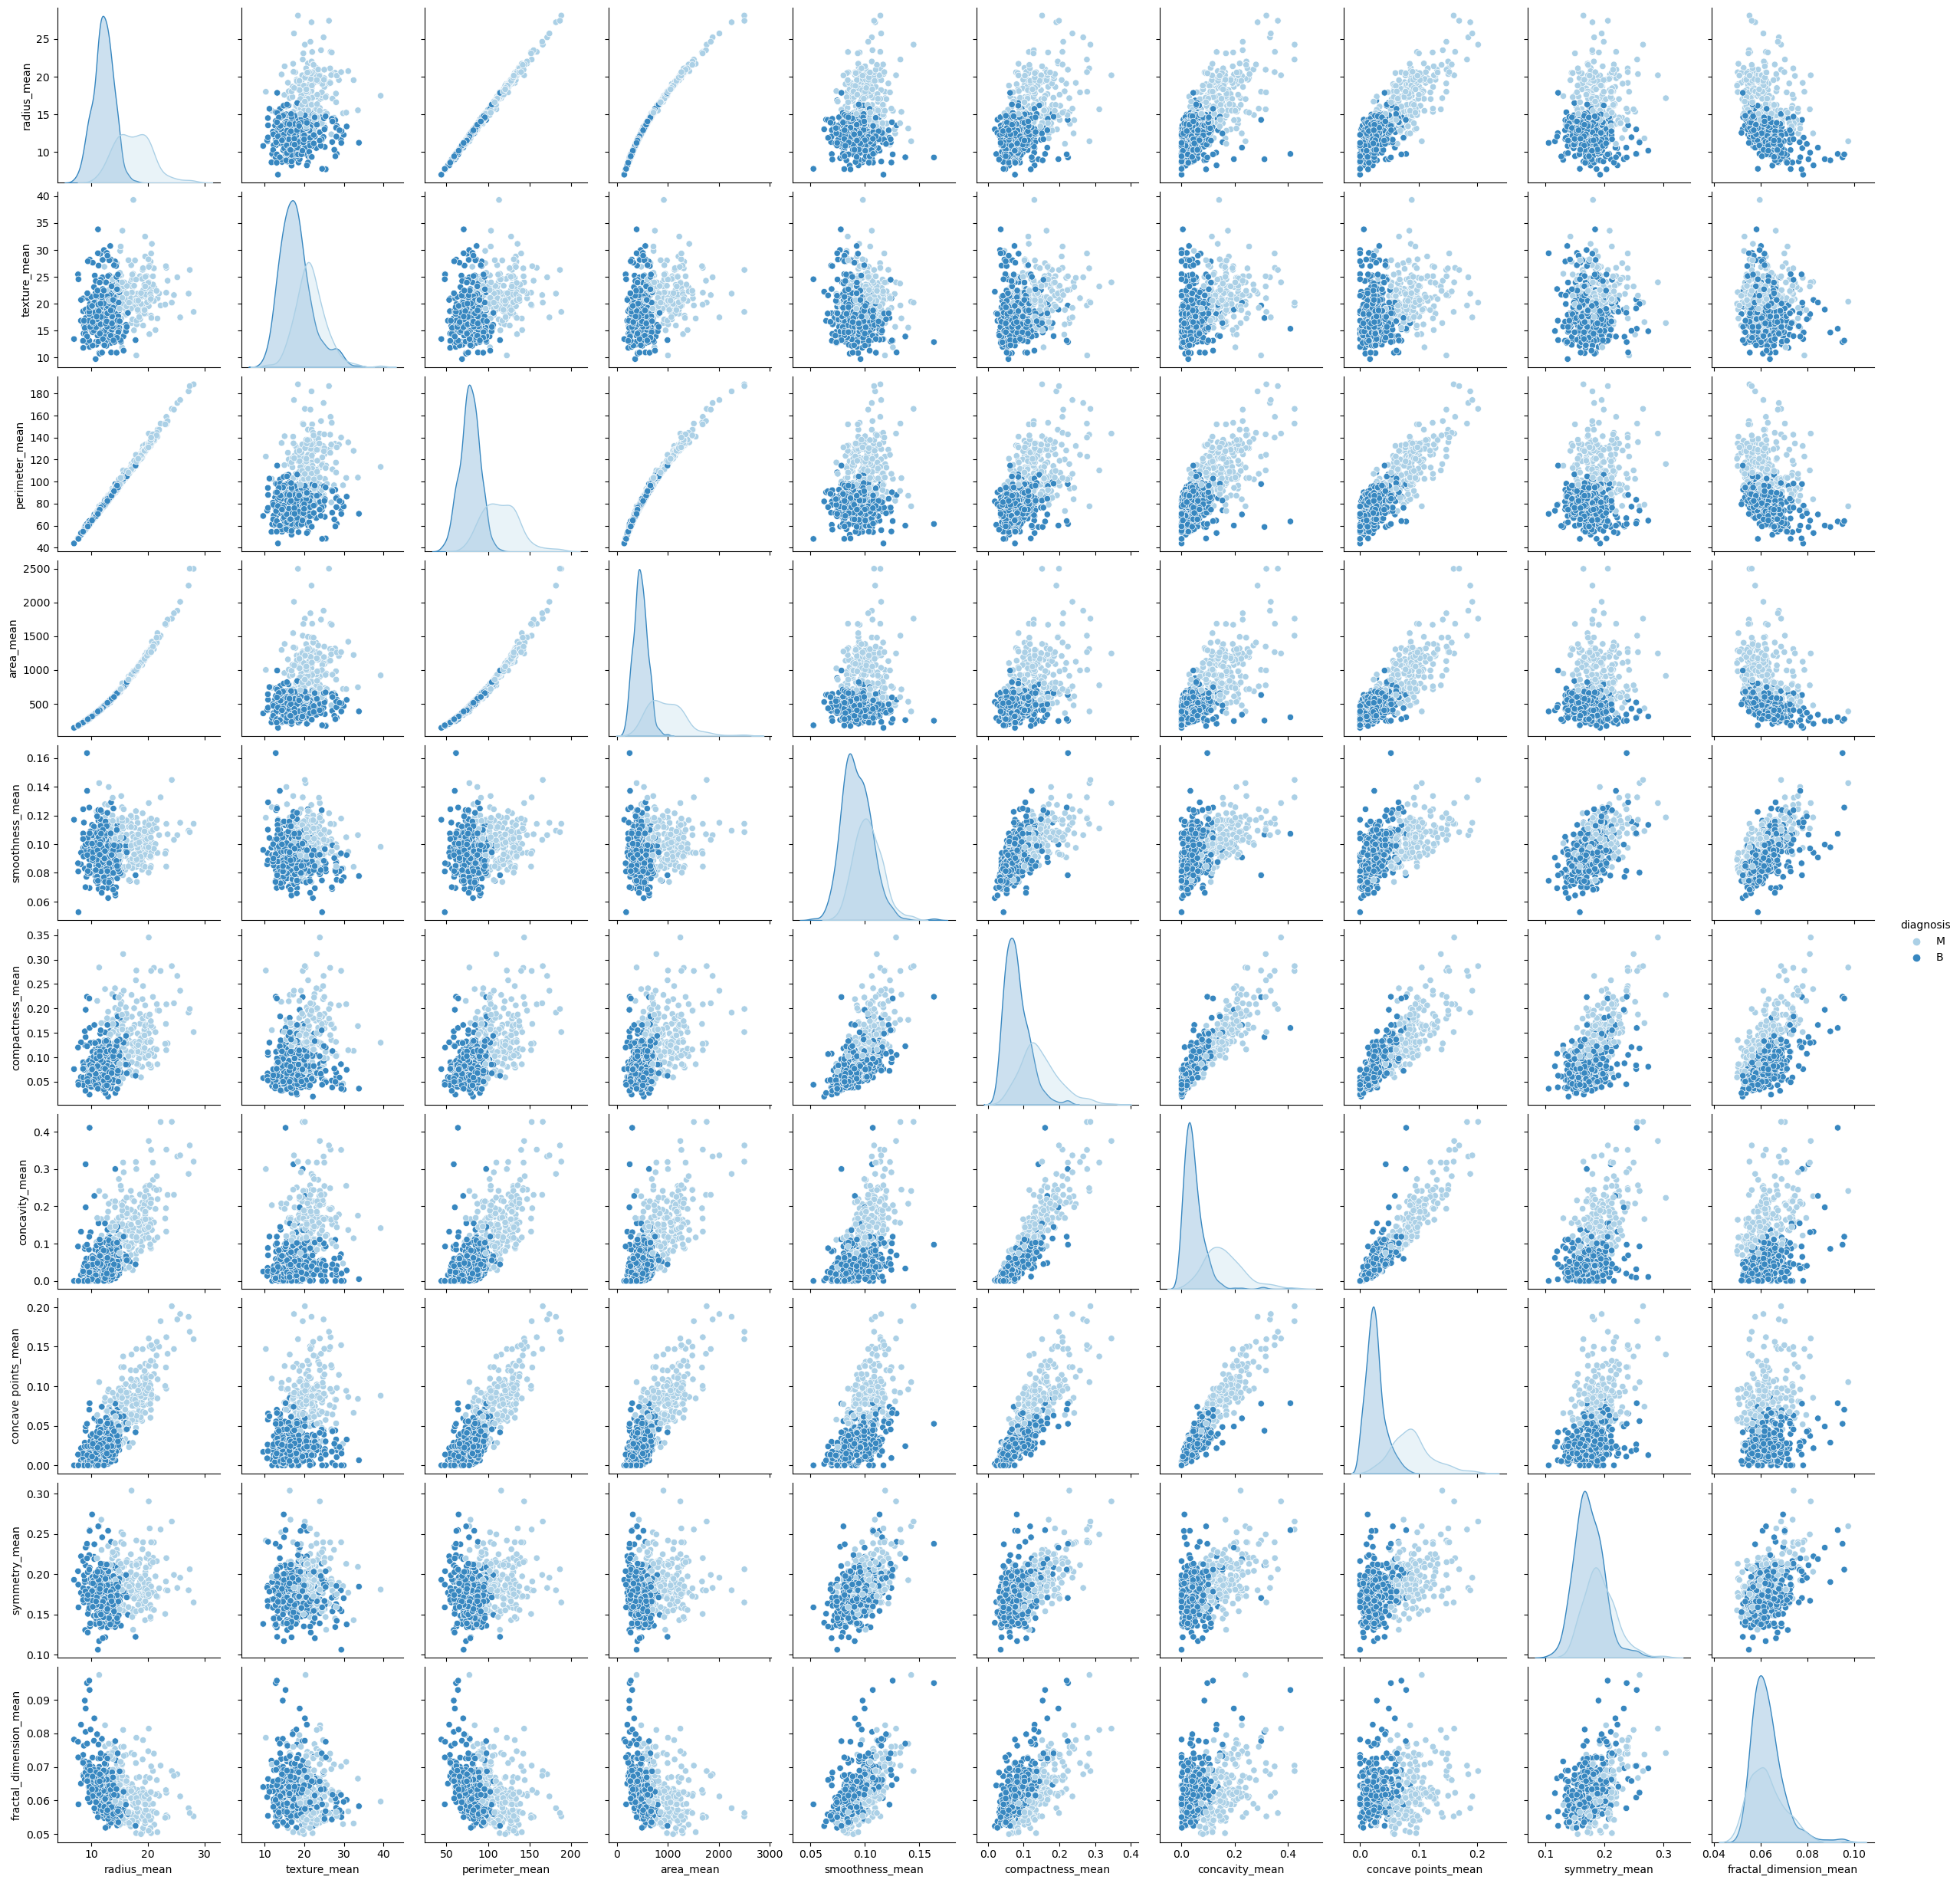

In [18]:
sns.pairplot(df[col_mean_d],hue = 'diagnosis', palette='Blues')

<AxesSubplot: >

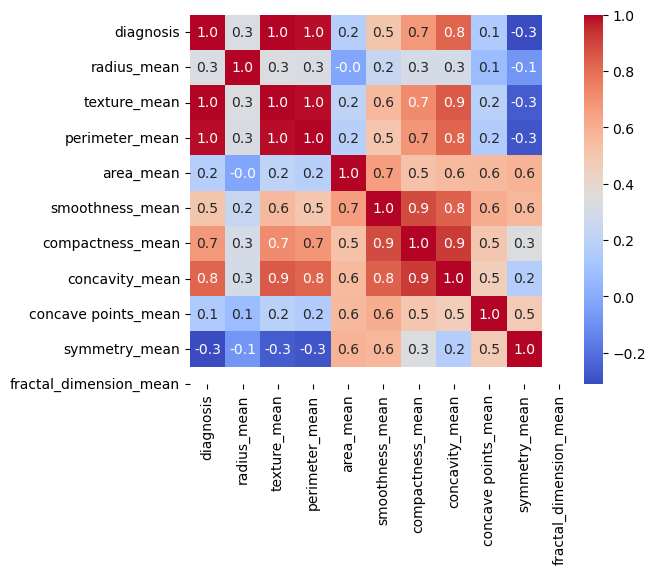

In [19]:
correlation = df[col_mean_d].corr()
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 10},
           xticklabels= col_mean_d, yticklabels= col_mean_d,
           cmap= 'coolwarm')

#### Standard Error Values

In [ ]:
sns.pairplot(df[col_se_d],hue = 'diagnosis', palette='Greens')

In [ ]:
correlation = df[col_se_d].corr()
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 10},
           xticklabels= col_se_d, yticklabels= col_se_d,
           cmap= 'coolwarm')

#### Worst Values

In [ ]:
sns.pairplot(df[col_worst_d],hue = 'diagnosis', palette='Oranges')

In [ ]:
correlation = df[col_worst_d].corr()
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 10},
           xticklabels= col_worst_d, yticklabels= col_worst_d,
           cmap= 'coolwarm')

### Feature Engineering

In [ ]:
df['diagnosis'].value_counts()

In [ ]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

### Outliers

#### Boxplot

In [ ]:
fig = plt.figure(figsize =(15,10))
ax = fig.add_axes([0, 0, 1, 1])
_ = ax.boxplot(df[col_mean])
plt.show()

In [ ]:
fig = plt.figure(figsize =(15,10))
ax = fig.add_axes([0, 0, 1, 1])
_ = ax.boxplot(df[col_se])
plt.show()

In [ ]:
fig = plt.figure(figsize =(15,10))
ax = fig.add_axes([0, 0, 1, 1])
_ = ax.boxplot(df[col_worst])
plt.show()

#### IQR

In [ ]:
def outliers_detection(feature):
    percentiles = np.percentile(feature, [25,75])

    iqr = stats.iqr(feature)
    lower_limit = percentiles[0] - 1.5 * iqr
    upper_limit = percentiles[1] + 1.5 * iqr
    filtered = df[(feature <= lower_limit) & (feature >= upper_limit)] 
    return filtered.size

In [ ]:
outliers = dict()
for feature_name in col_mean:
    outliers[feature_name] =  outliers_detection(df[feature_name])
print("Detected outliers for Mean columns:")
print(outliers)

In [ ]:
outliers = dict()
for feature_name in col_se:
    outliers[feature_name] =  outliers_detection(df[feature_name])
print("Detected outliers for Standard Error columns:")
print(outliers)

In [ ]:
outliers = dict()
for feature_name in col_worst:
    outliers[feature_name] =  outliers_detection(df[feature_name])
print("Detected outliers for Worst columns:")
print(outliers)

## Model building

### Manual Feature Selection Based On Correlation

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean.

Compactness_mean, concavity_mean and concave points_mean are also correlated with each other.Therefore we can pick concavity_mean.

Other correlations and our picks are as follows:
radius_se, perimeter_se and area_se -> area_se
radius_worst, perimeter_worst and area_worst -> area_worst
compactness_worst, concavity_worst and concave points_worst -> concavity_worst
compactness_se, concavity_se and concave points_se -> concavity_se
texture_mean and texture_worst -> texture_mean
area_worst and area_mean -> area_mean

We are left with the following features

In [ ]:
drop_list = ['diagnosis', 'perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df_manual = df.drop(drop_list, axis = 1 ) 
df_manual.head()
print(list(df_manual.columns))



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_manual, df['diagnosis'], test_size=0.3)

In [ ]:
rf = RandomForestClassifier()      
rf = rf.fit(X_train,y_train)

ac = accuracy_score(y_test,rf.predict(X_test))
print('Accuracy is: ', ac)

### K Best Feature Selection

Finding 5 best scored features

In [ ]:
def get_kbest_features(X_train, X_test, y_train, y_test):
    accuracy_list = []
    features_selected = []
    for i in range(2,16):

        kbest_features = SelectKBest(chi2, k=i).fit(X_train, y_train)
        X_train_2 = kbest_features.transform(X_train)
        X_test_2 = kbest_features.transform(X_test)

        rf = RandomForestClassifier()
        rf = rf.fit(X_train_2,y_train)

        ac = accuracy_score(y_test,rf.predict(X_test_2))
        accuracy_list.append(ac)
        features_selected.append(kbest_features.get_feature_names_out())

    best_accuracy = max(accuracy_list)
    best_index = accuracy_list.index(best_accuracy)+2
    kbest_features = features_selected[best_index-2]
    print("Best Accuracy : %s" % "{0:.3%}".format(best_accuracy))
    print(f'''With {best_index} features''')
    print("Feature names:")
    print(kbest_features)
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score of number of selected features")
    plt.plot(range(2, len(accuracy_list) + 2), accuracy_list)
    plt.show()
    return kbest_features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['diagnosis'], axis=1), df['diagnosis'], test_size=0.3)
rf = rf.fit(X_train,y_train)

ac = accuracy_score(y_test,rf.predict(X_test))
print('Accuracy is: ', ac)

### Recursive Feature Elimination With Cross Validation

In [ ]:
rfecv = RFECV(estimator=rf, 
              step=1, 
              cv=5,
              scoring='accuracy')
rfecv.fit(X_train, y_train)


plt.figure( figsize=(16, 6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


### Tree Based Feature Selection With Random Forest

In [ ]:
rf = rf.fit(X_train,y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### PCA

In [ ]:
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

pca = PCA()
pca.fit(X_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

### Spliting data into test and training sets

In [ ]:
#all features
predictor_features_all  = df.drop(['diagnosis'], axis=1)
outcome_feature_all = df['diagnosis'];
predictor_columns_all = list(predictor_features_all.columns)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(predictor_features_all, outcome_feature_all, test_size = 0.3)


#KBest features
kbest_features = get_kbest_features(X_train_all, X_test_all, y_train_all, y_test_all)
predictor_features_kbest  = df[kbest_features]
outcome_feature_kbest = df['diagnosis']

X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(predictor_features_kbest, outcome_feature_kbest, test_size = 0.3)

Feature Scaling

In [ ]:
def scale_data(scaler, train_data, test_data):
    train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data).copy(), columns = list(train_data.columns))
    train_data_scaled
    test_data_scaled = pd.DataFrame(scaler.fit_transform(test_data).copy(), columns = list(test_data.columns))
    return (train_data_scaled,test_data_scaled)

Standard Scaling

In [ ]:
X_train_kbest_ss, X_test_kbest_ss = scale_data(scaler = StandardScaler(), train_data = X_train_kbest, test_data = X_test_kbest)

MinMax Scaling

In [ ]:
X_train_kbest_mms, X_test_kbest_mms = scale_data(scaler = MinMaxScaler(), train_data = X_train_kbest, test_data = X_test_kbest)

Robust Scaling

In [ ]:
X_train_kbest_rs, X_test_kbest_rs = scale_data(scaler = RobustScaler(), train_data = X_train_kbest, test_data = X_test_kbest)

Model training and prediction with KFold validation

In [ ]:
def classification_model(model, train_predictors, train_outcome, test_predictors, test_outcome):
    
    model.fit(train_predictors,train_outcome)
    predictions = model.predict(test_predictors)
    accuracy = accuracy_score(predictions,test_outcome)
    print("Accuracy : %s" % "{0:.3%}".format(accuracy)) 

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for i, (train_index, test_index) in enumerate(kf.split(train_predictors)):
        # Filter training data
        train_predictors_d = (train_predictors.iloc[train_index,:])

        # The target we're using to train the algorithm.
        train_target = train_outcome.iloc[train_index]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors_d, train_target)

        #Record error from each cross-validation run
        error.append(model.score(train_predictors.iloc[test_index,:], train_outcome.iloc[test_index]))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    ConfusionMatrixDisplay(confusion_matrix(test_outcome,predictions)).plot()
    return accuracy


### Feature Selection

### Hyperparameters Search With Grid Search 

In [ ]:
def classification_model_gridsearch(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    grid_search.fit(X_train,y_train)
    
    print("The best parameter found on development set is :")
    print(grid_search.best_params_)
    print("the best estimator is ")
    print(grid_search.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(grid_search.best_score_)
    
    predictions = grid_search.predict(X_test)
    accuracy = accuracy_score(predictions,y_test)
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    return grid_search.best_params_.copy()

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
model= DecisionTreeClassifier()
classification_model_gridsearch(model,param_grid,X_train,y_train,X_test,y_test)

### Hyperparameters Search With Random Search 

In [ ]:
def classification_model_randomsearch(model, parameters, X_train, y_train, X_test, y_test):
    random_search = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
    random_search.fit(X_train, y_train)

    print("The best parameter found on development set is :")
    print(random_search.best_params_)
    print("the best estimator is ")
    print(random_search.best_estimator_)
    print("The best score is ")
    print(random_search.best_score_)
    
    predictions = random_search.predict(X_test)
    accuracy = accuracy_score(predictions,y_test)
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
#graph_scores(score_list,model_labels, "No Modification")

## Model Testing

### Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_base_accuracy = 0
lr_boosted_accuracies = []
lr_boosted_best = 0

In [ ]:
lr_base_accuracy = classification_model(lr_model, X_train_all, y_train_all, X_test_all, y_test_all)

In [ ]:
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
#best_params = classification_model_gridsearch(lr_model, grid, X_train_kbest, y_train_kbest, X_test_kbest, y_test_kbest)
#print(best_params)
#lr_model.set_params(**best_params)

In [ ]:
lr_boosted_accuracies.append(classification_model(lr_model, X_train_kbest_ss, y_train_kbest, X_test_kbest_ss, y_test_kbest))

In [ ]:
lr_boosted_accuracies.append(classification_model(lr_model, X_train_kbest_mms, y_train_kbest, X_test_kbest_mms, y_test_kbest))

In [ ]:
lr_boosted_accuracies.append(classification_model(lr_model, X_train_kbest_rs, y_train_kbest, X_test_kbest_rs, y_test_kbest))

In [ ]:
lr_boosted_best = max(lr_boosted_accuracies)
print(lr_boosted_best)

### SVM

In [ ]:
sv_model = SVC()
sv_base_accuracy = 0
sv_boosted_accuracies = []
sv_boosted_best = 0

In [ ]:
sv_base_accuracy = classification_model(sv_model, X_train_all, y_train_all, X_test_all, y_test_all)

In [ ]:
#grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#best_params = classification_model_gridsearch(sv_model, grid, X_train_kbest, y_train_kbest, X_test_kbest, y_test_kbest)
#print(best_params)
#lr_model.set_params(**best_params)

In [ ]:
sv_boosted_accuracies.append(classification_model(sv_model, X_train_kbest_ss, y_train_kbest, X_test_kbest_ss, y_test_kbest))

In [ ]:
sv_boosted_accuracies.append(classification_model(sv_model, X_train_kbest_mms, y_train_kbest, X_test_kbest_mms, y_test_kbest))

In [ ]:
sv_boosted_accuracies.append(classification_model(sv_model, X_train_kbest_rs, y_train_kbest, X_test_kbest_rs, y_test_kbest))

In [ ]:
sv_boosted_best = max(sv_boosted_accuracies)
print(sv_boosted_best)

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_base_accuracy = 0
rf_boosted_accuracies = []
rf_boosted_best = 0

In [ ]:
rf_base_accuracy = classification_model(rf_model, X_train_all, y_train_all, X_test_all, y_test_all)

In [ ]:
#grid = {
#    'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000]
#}
#best_params = classification_model_gridsearch(rf_model, grid, X_train_kbest, y_train_kbest, X_test_kbest, y_test_kbest)
#print(best_params)
#lr_model.set_params(**best_params)

In [ ]:
rf_boosted_accuracies.append(classification_model(rf_model, X_train_kbest_ss, y_train_kbest, X_test_kbest_ss, y_test_kbest))

In [ ]:
rf_boosted_accuracies.append(classification_model(rf_model, X_train_kbest_mms, y_train_kbest, X_test_kbest_mms, y_test_kbest))

In [ ]:
rf_boosted_accuracies.append(classification_model(rf_model, X_train_kbest_rs, y_train_kbest, X_test_kbest_rs, y_test_kbest))

In [ ]:
rf_boosted_best = max(rf_boosted_accuracies)
print(rf_boosted_best)

### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_base_accuracy = 0
dt_boosted_accuracies = []
dt_boosted_best = 0

In [ ]:
dt_base_accuracy = classification_model(dt_model, X_train_all, y_train_all, X_test_all, y_test_all)

In [ ]:
#grid = {'max_features': ['auto', 'sqrt', 'log2'],
#              'ccp_alpha': [0.1, .01, .001],
#              'max_depth' : [5, 6, 7, 8, 9],
#              'criterion' :['gini', 'entropy']
#}
#best_params = classification_model_gridsearch(dt_model, grid, X_train_kbest, y_train_kbest, X_test_kbest, y_test_kbest)
#print(best_params)
#dt_model.set_params(**best_params)

In [ ]:
dt_boosted_accuracies.append(classification_model(dt_model, X_train_kbest_ss, y_train_kbest, X_test_kbest_ss, y_test_kbest))

In [ ]:
dt_boosted_accuracies.append(classification_model(dt_model, X_train_kbest_mms, y_train_kbest, X_test_kbest_mms, y_test_kbest))

In [ ]:
dt_boosted_accuracies.append(classification_model(dt_model, X_train_kbest_rs, y_train_kbest, X_test_kbest_rs, y_test_kbest))

In [ ]:
dt_boosted_best = max(dt_boosted_accuracies)
print(dt_boosted_best)

### K Nearest Neighbor

In [ ]:
knn_model = KNeighborsClassifier()

error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

min_error = min(error_rate)
min_index = error_rate.index(min_error)+1

print("Lowest error : %s" % "{0:.3%}".format(min_error))
print(f'''With K = {min_index} features''')

plt.figure()
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.plot(range(1, len(error_rate) + 1), error_rate)
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=min_index)
knn_base_accuracy = 0
knn_boosted_accuracies = []
knn_boosted_best = 0

In [ ]:
knn_base_accuracy = classification_model(knn_model, X_train_all, y_train_all, X_test_all, y_test_all)

In [ ]:
#grid = {
#    'n_neighbors': (1,10, 1),
#   'leaf_size': (20,40,1),
#    'p': (1,2),
#    'weights': ('uniform', 'distance'),
#    'metric': ('minkowski', 'chebyshev'),
#}  
#best_params = classification_model_gridsearch(knn_model, grid, X_train_kbest, y_train_kbest, X_test_kbest, y_test_kbest)
#print(best_params)
#knn_model.set_params(**best_params)

In [ ]:
knn_boosted_accuracies.append(classification_model(knn_model, X_train_kbest_ss, y_train_kbest, X_test_kbest_ss, y_test_kbest))

In [ ]:
knn_boosted_accuracies.append(classification_model(knn_model, X_train_kbest_mms, y_train_kbest, X_test_kbest_mms, y_test_kbest))

In [ ]:
knn_boosted_accuracies.append(classification_model(knn_model, X_train_kbest_rs, y_train_kbest, X_test_kbest_rs, y_test_kbest))

In [ ]:
knn_boosted_best = max(knn_boosted_accuracies)
print(knn_boosted_best)

### Naive Bayes

Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_base_accuracy = 0
nb_boosted_accuracies = []
nb_boosted_best = 0

In [ ]:
nb_base_accuracy = classification_model(nb_model, X_train_all, y_train_all, X_test_all, y_test_all)

In [ ]:
nb_boosted_accuracies.append(classification_model(nb_model, X_train_kbest_ss, y_train_kbest, X_test_kbest_ss, y_test_kbest))

In [ ]:
nb_boosted_accuracies.append(classification_model(nb_model, X_train_kbest_mms, y_train_kbest, X_test_kbest_mms, y_test_kbest))

In [ ]:
nb_boosted_accuracies.append(classification_model(nb_model, X_train_kbest_rs, y_train_kbest, X_test_kbest_rs, y_test_kbest))

In [ ]:
nb_boosted_best = max(nb_boosted_accuracies)
print(nb_boosted_best)

### Conclusion

In [ ]:
all_features_scores = [lr_base_accuracy,sv_base_accuracy,rf_base_accuracy,dt_base_accuracy,knn_base_accuracy,nb_base_accuracy]
boosted_features_scores = [lr_boosted_best,sv_boosted_best,rf_boosted_best,dt_boosted_best,knn_boosted_best,nb_boosted_best]
model_labels = ["LR", "SVM", "RF", "DT", "KNN", "NB"]

graph_scores(all_features_scores, model_labels, "All features")
graph_scores(boosted_features_scores, model_labels, "KBest Features With Scaling")